# Crawl

Các công cụ:

 beautifulsoup4 (dùng parsing)

 requests

 scrapy (nên dùng khi mà project lớn).

 selenium (auto testing, hay dùng khi crawl các trang mà dùng javascript).

 scrapy +  slenium / splash.

 xpath, css_selector

### beautifulsoup4

In [2]:
# install beautifulsoup4, requests
!pip install beautifulsoup4
!pip install requests

In [7]:
# import
import requests
from bs4 import BeautifulSoup as soup


In [32]:
# get html from url = https://realpython.github.io/fake-jobs/
url = 'https://realpython.github.io/fake-jobs/'
rq = requests.get(url) # requests.post, requests.port,... --> API


In [33]:
# using bs4
doc = soup(rq.text)

print("Senior Python Developer" in rq.text)

True


In [42]:
rq.text

'<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Fake Python</title>\n    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">\n  </head>\n  <body>\n  <section class="section">\n    <div class="container mb-5">\n      <h1 class="title is-1">\n        Fake Python\n      </h1>\n      <p class="subtitle is-3">\n        Fake Jobs for Your Web Scraping Journey\n      </p>\n    </div>\n    <div class="container">\n    <div id="ResultsContainer" class="columns is-multiline">\n    <div class="column is-half">\n<div class="card">\n  <div class="card-content">\n    <div class="media">\n      <div class="media-left">\n        <figure class="image is-48x48">\n          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">\n        </figure>\n      </div>\n      <div class="media-content"

In [26]:
# get title phần tử đầu tiền
doc.find(id="ResultsContainer")
doc.find(id="ResultsContainer").find_all('div', {"class":"card-content"})[0]
doc.find(id="ResultsContainer").find_all('div', {"class":"card-content"})[0].find('h2', {"class" : "title is-5"}).get_text()


'Senior Python Developer'

In [37]:
data = []
elements = doc.find(id="ResultsContainer").find_all('div', {"class":"card-content"})
for element in elements:
    data_itr = dict()
    data_itr['title'] = element.find('h2', {"class" : "title is-5"}).get_text()
    data_itr['authors'] = element.find('h3', {"class" : "subtitle is-6 company"}).get_text()

    data.append(data_itr)
    # print(element.find('h2', {"class" : "title is-5"}).get_text())
    
    # print(element.find('h3', {"class" : "subtitle is-6 company"}).get_text())

In [40]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,title,authors
0,Senior Python Developer,"Payne, Roberts and Davis"
1,Energy engineer,Vasquez-Davidson
2,Legal executive,"Jackson, Chambers and Levy"
3,Fitness centre manager,Savage-Bradley
4,Product manager,Ramirez Inc


In [44]:
# Save csv 
df.to_csv('data.csv', index = False)
# save excel
df.to_excel('data.xlsx', index = False)

In [30]:
# shope
rq = requests.get('https://shopee.vn/')
rq.text

print("Tech Zone" in rq)

# Không get được text

False


In [ ]:
# Khi dùng selenium thì get được.
# 
# 

# preprocessing dataset (cleaning, parsing, ....)

In [47]:
# crawl text in url

url = 'https://arxiv.org/abs/2101.00001'

rq = requests.get(url)
doc = soup(rq.text)

text = doc.find("blockquote", {'class' : 'abstract mathjax'}).get_text()

In [48]:
print(text)


Abstract:  The Multi-armed bandit offer the advantage to learn and exploit the already
learnt knowledge at the same time. This capability allows this approach to be
applied in different domains, going from clinical trials where the goal is
investigating the effects of different experimental treatments while minimizing
patient losses, to adaptive routing where the goal is to minimize the delays in
a network. This article provides a review of the recent results on applying
bandit to real-life scenario and summarize the state of the art for each of
these fields. Different techniques has been proposed to solve this problem
setting, like epsilon-greedy, Upper confident bound (UCB) and Thompson Sampling
(TS). We are showing here how this algorithms were adapted to solve the
different problems of exploration exploitation.

    


In [50]:
# lowercase
text = text.lower()
text

'\nabstract:  the multi-armed bandit offer the advantage to learn and exploit the already\nlearnt knowledge at the same time. this capability allows this approach to be\napplied in different domains, going from clinical trials where the goal is\ninvestigating the effects of different experimental treatments while minimizing\npatient losses, to adaptive routing where the goal is to minimize the delays in\na network. this article provides a review of the recent results on applying\nbandit to real-life scenario and summarize the state of the art for each of\nthese fields. different techniques has been proposed to solve this problem\nsetting, like epsilon-greedy, upper confident bound (ucb) and thompson sampling\n(ts). we are showing here how this algorithms were adapted to solve the\ndifferent problems of exploration exploitation.\n\n    '

In [61]:
# remove punctuation
# [](){}\n\t.,:.  ...
# - 

# Cách 1.
# Xóa kí tự \n
# print(text.replace('\n', ''))

# Xóa kí tự ,
# print(text.replace(',', ''))

# using regex
import re
re.sub('[^a-zA-Z0-9\-]', ' ', text)

# đọc documents của regex

' abstract   the multi-armed bandit offer the advantage to learn and exploit the already learnt knowledge at the same time  this capability allows this approach to be applied in different domains  going from clinical trials where the goal is investigating the effects of different experimental treatments while minimizing patient losses  to adaptive routing where the goal is to minimize the delays in a network  this article provides a review of the recent results on applying bandit to real-life scenario and summarize the state of the art for each of these fields  different techniques has been proposed to solve this problem setting  like epsilon-greedy  upper confident bound  ucb  and thompson sampling  ts   we are showing here how this algorithms were adapted to solve the different problems of exploration exploitation       '

In [70]:
# dùng split kết với join
# re.sub('[^a-zA-Z0-9\-]', ' ', text).split() # dừng lại bước lại
' '.join(re.sub('[^a-zA-Z0-9\-]', ' ', text).split())

'abstract the multi-armed bandit offer the advantage to learn and exploit the already learnt knowledge at the same time this capability allows this approach to be applied in different domains going from clinical trials where the goal is investigating the effects of different experimental treatments while minimizing patient losses to adaptive routing where the goal is to minimize the delays in a network this article provides a review of the recent results on applying bandit to real-life scenario and summarize the state of the art for each of these fields different techniques has been proposed to solve this problem setting like epsilon-greedy upper confident bound ucb and thompson sampling ts we are showing here how this algorithms were adapted to solve the different problems of exploration exploitation'

In [82]:
# tokenize
list_token = re.sub('[^a-zA-Z0-9\-]', ' ', text).split()

# remove stopwords.
stop_words = ['the', 'to']

list_token_remove_stopwords = [ token for token in list_token if token not in stop_words]

# tương đương 
# list_token_remove_stopwords = []
# for token in list_token:
#     if token not in stop_words:
#         list_token_remove_stopwords.append(token)
    
list_token_remove_stopwords

['abstract',
 'multi-armed',
 'bandit',
 'offer',
 'advantage',
 'learn',
 'and',
 'exploit',
 'already',
 'learnt',
 'knowledge',
 'at',
 'same',
 'time',
 'this',
 'capability',
 'allows',
 'this',
 'approach',
 'be',
 'applied',
 'in',
 'different',
 'domains',
 'going',
 'from',
 'clinical',
 'trials',
 'where',
 'goal',
 'is',
 'investigating',
 'effects',
 'of',
 'different',
 'experimental',
 'treatments',
 'while',
 'minimizing',
 'patient',
 'losses',
 'adaptive',
 'routing',
 'where',
 'goal',
 'is',
 'minimize',
 'delays',
 'in',
 'a',
 'network',
 'this',
 'article',
 'provides',
 'a',
 'review',
 'of',
 'recent',
 'results',
 'on',
 'applying',
 'bandit',
 'real-life',
 'scenario',
 'and',
 'summarize',
 'state',
 'of',
 'art',
 'for',
 'each',
 'of',
 'these',
 'fields',
 'different',
 'techniques',
 'has',
 'been',
 'proposed',
 'solve',
 'this',
 'problem',
 'setting',
 'like',
 'epsilon-greedy',
 'upper',
 'confident',
 'bound',
 'ucb',
 'and',
 'thompson',
 'sampling'

In [86]:
# Stopwords lấy ở đâu.

# 1. Có sẵn

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

#

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# 2. Từ trong dataset của mình.

# Ví dụ: trong dataset có 10 000 documents, với mỗi documents làm tới bước tokenize.
# Thống kê, những từ nào xuất hiên 1000 lần thì đó stopwords.


In [90]:
# Stemming and lemmatization
# vd : says -> say, 

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# đọc prrtter stemmer

stemmer.stem('says')


'say'

In [96]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
lemma.lemmatize('does', pos = 'v')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'do'

Bài tập

1. 
 Viết lại các thao tác phần crawl dưới dạng function 

 function thứ 1

> 

    Input : url

    output : text của trang url đó

 function 2, parsing

    input : text (string)

    output: kết quả crawl được. 

 function 3, save duới dạng file, csv, excel.

     input, output không bắt buộc.

Bài 2

a) Với trang url sau https://arxiv.org/abs/2101.00005

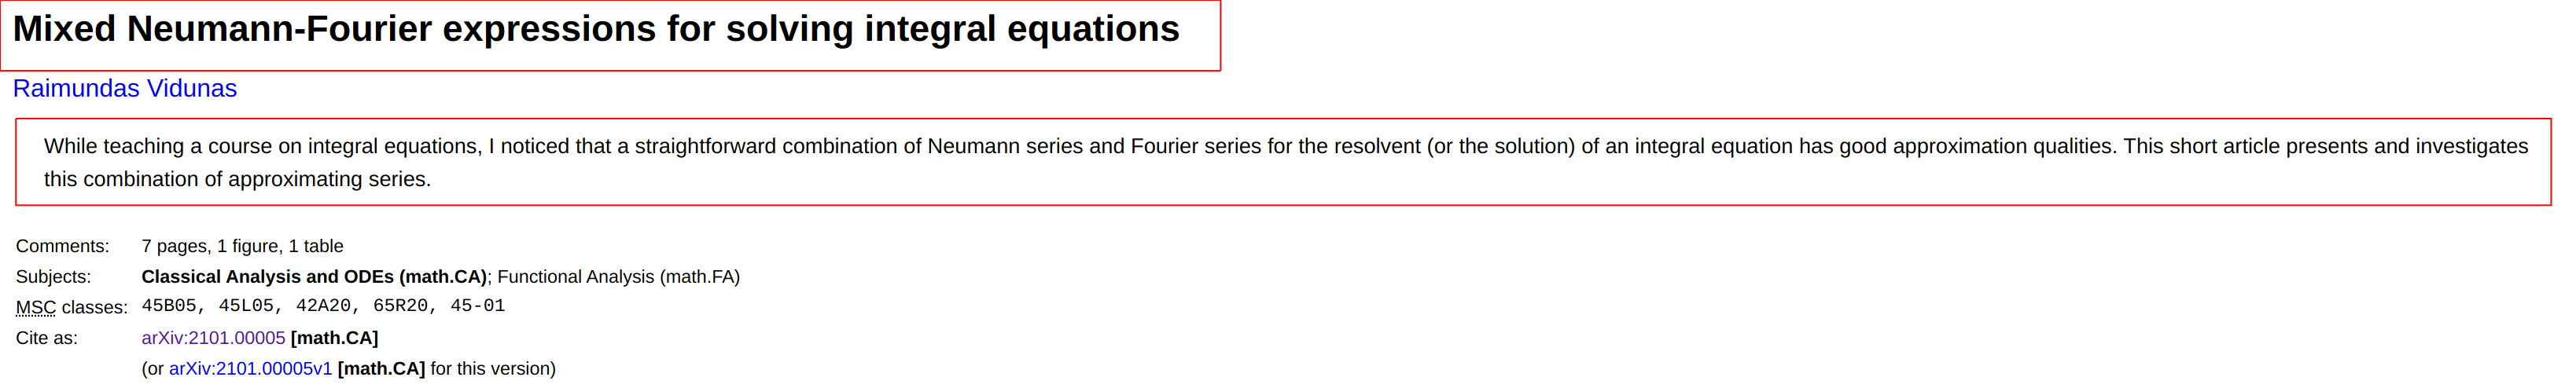

Viết hàm lấy các thông tin được tô đỏ.ô đỏ thứ nhất là Title, thứ 2 là Abstact

b) Với trang url sau https://arxiv.org/list/math/2101

có 25 bài viết 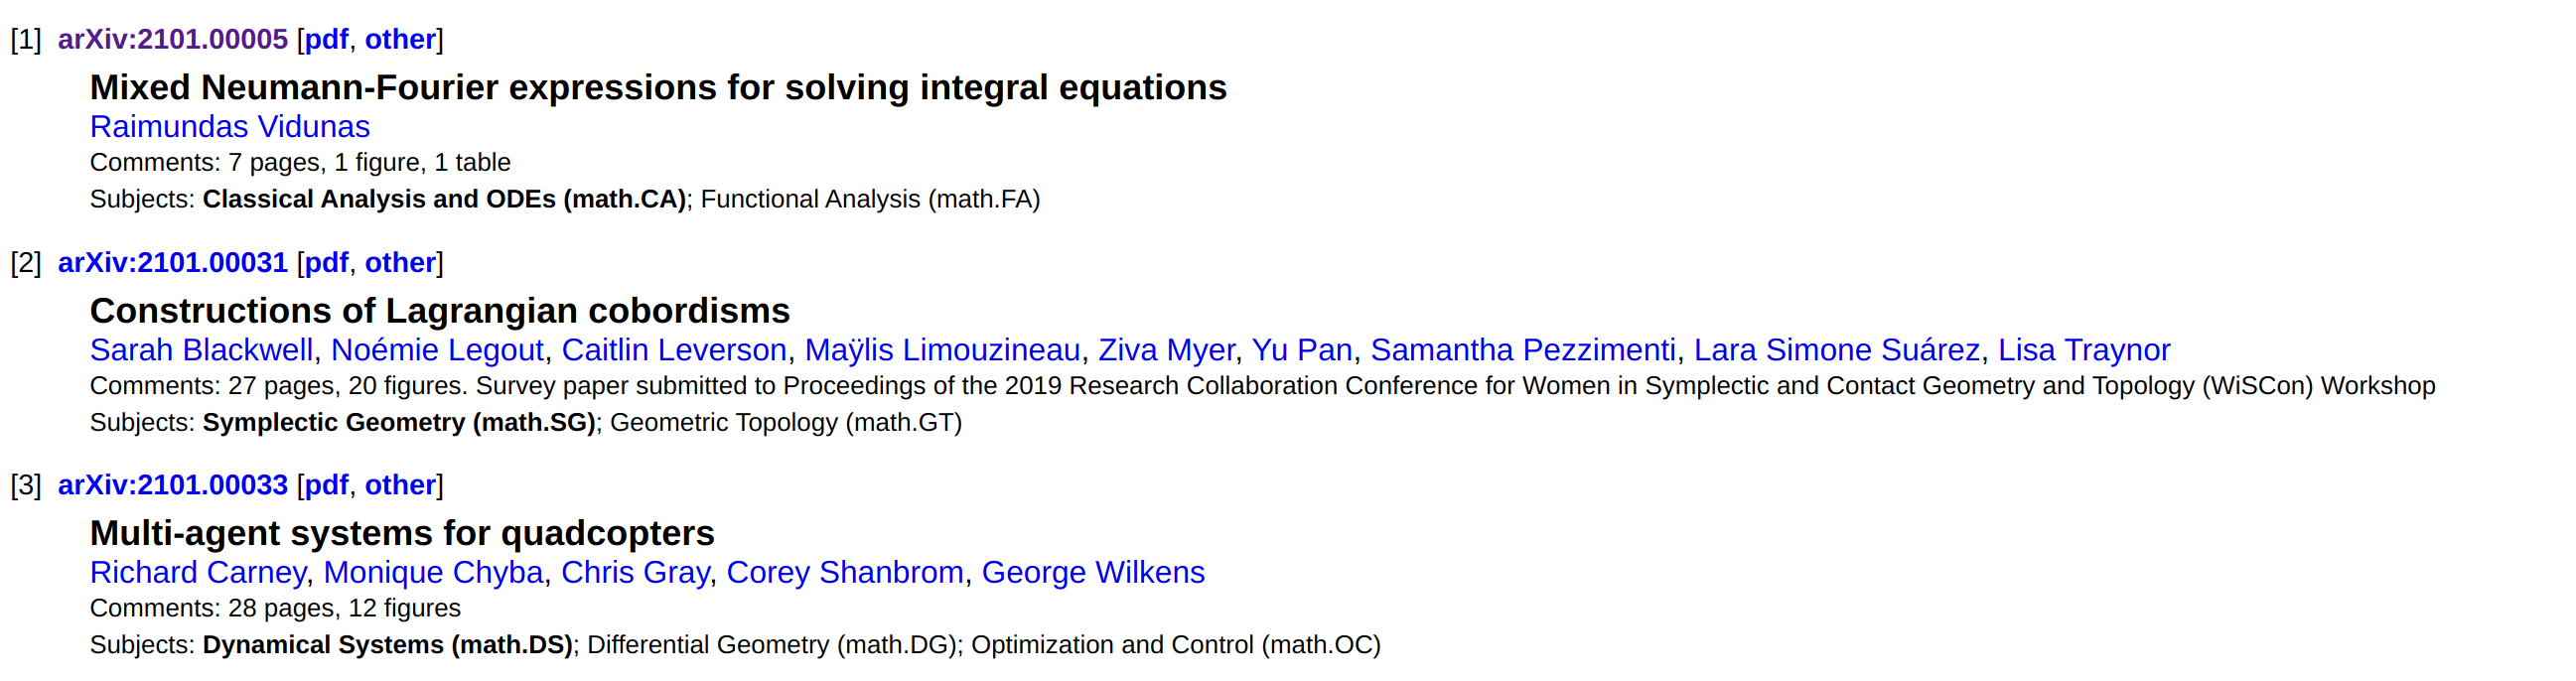

Viết hàm lấy link các bài viết

c) Viết hàm crawl data 
   Với mỗi link ở b) thì dùng hàm viết ở a) để lấy thông tin.

   Và lưu dưới dạng file csv. 

file csv sẽ có 3 cột: 1 cột link(từ b) 2 cột data từ a).



d) Đọc lại file của c), tiến hành các tiền xử lý lần lượt các bước sau trên cột chứa data abstract

1.   Lowercase 
2.   remove punctuation (chỉ để lại chữ cái, dấu '-', khoảng trắng)
3. tokenize
4. remove stopwords (dùng stopwords của nltk)
5. stemming and lemmatization (dùng của nltk)

